<a href="https://colab.research.google.com/github/UrsWolverine/Machine-Learning-approach-to-predict-flight-arrival-delay/blob/main/ML_With_graphs_Q5_HW_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import time
import gzip
import io
import requests

# Fetching and loading the data from the URL.
url = "https://snap.stanford.edu/data/bigdata/communities/com-lj.ungraph.txt.gz"
response = requests.get(url)
edges = []

# Handling .gz file and reading data.
with gzip.GzipFile(fileobj=io.BytesIO(response.content), mode='rb') as file:
    for line in file:
        # Decode binary line to string
        decoded_line = line.decode('utf-8')
        # Skip comments.
        if decoded_line.startswith("#"):
            continue
        # Add edge.
        node1, node2 = map(int, decoded_line.split())
        edges.append((node1, node2))

# Display first few edges.
print("First few edges:")
print(edges[:10])

First few edges:
[(0, 1), (0, 2), (0, 31), (0, 73), (0, 80), (0, 113619), (0, 2468556), (0, 2823829), (0, 2823833), (0, 2846857)]


In [2]:
def remove_edges(edges, percentage):
    num_remove = int(len(edges) * (percentage / 100))
    return random.sample(edges, len(edges) - num_remove)

def largest_connected_component_bfs(edges):
    G = nx.Graph()
    G.add_edges_from(edges)

    visited = set()  # To keep track of visited nodes.
    max_component_size = 0  # To store the size of the largest connected component.

    for node in G.nodes():
        if node not in visited:
            # If the node is not visited, perform BFS from that node.
            current_component_size = 0  # Size of the currently explored component.
            queue = deque([node])  # Queue for BFS.

            while queue:
                current_node = queue.popleft()
                if current_node not in visited:
                    visited.add(current_node)
                    current_component_size += 1  # Increment the size.

                    # Neighbors logging.
                    for neighbor in G.neighbors(current_node):
                        if neighbor not in visited:
                            # print(f"Visiting neighbor: {neighbor} from node: {current_node}")  # Logging visited neighbor.
                            queue.append(neighbor)

            # Update max_component_size if the current component is larger.
            max_component_size = max(max_component_size, current_component_size)

    return max_component_size


x_values = list(range(1, 101))
xS_values = []

original_edges = edges[:]  # Copy to avoid modifying the original data.

In [3]:
for x in x_values:
    start_time = time.time()  # Storing the start time

    modified_edges = remove_edges(original_edges, x)
    print(f"\nIteration {x}/{len(x_values)}, Removed {len(original_edges) - len(modified_edges)} edges, remaining: {len(modified_edges)}")

    xS = largest_connected_component_bfs(modified_edges)

    end_time = time.time()  # Storing the end time
    elapsed_time = end_time - start_time  # Calculating elapsed time

    xS_values.append(xS)
    print(f"x={x}, xS={xS}, Elapsed Time: {elapsed_time:.2f} seconds")


Iteration 1/100, Removed 346811 edges, remaining: 34334378
x=1, xS=3988981, Elapsed Time: 401.15 seconds

Iteration 2/100, Removed 693623 edges, remaining: 33987566
x=2, xS=3980147, Elapsed Time: 366.38 seconds

Iteration 3/100, Removed 1040435 edges, remaining: 33640754
x=3, xS=3971172, Elapsed Time: 369.09 seconds

Iteration 4/100, Removed 1387247 edges, remaining: 33293942
x=4, xS=3961890, Elapsed Time: 342.72 seconds

Iteration 5/100, Removed 1734059 edges, remaining: 32947130
x=5, xS=3952928, Elapsed Time: 370.69 seconds

Iteration 6/100, Removed 2080871 edges, remaining: 32600318
x=6, xS=3942976, Elapsed Time: 335.69 seconds

Iteration 7/100, Removed 2427683 edges, remaining: 32253506
x=7, xS=3933817, Elapsed Time: 331.23 seconds

Iteration 8/100, Removed 2774495 edges, remaining: 31906694
x=8, xS=3924232, Elapsed Time: 342.86 seconds

Iteration 9/100, Removed 3121307 edges, remaining: 31559882
x=9, xS=3914053, Elapsed Time: 320.69 seconds

Iteration 10/100, Removed 3468118 edge

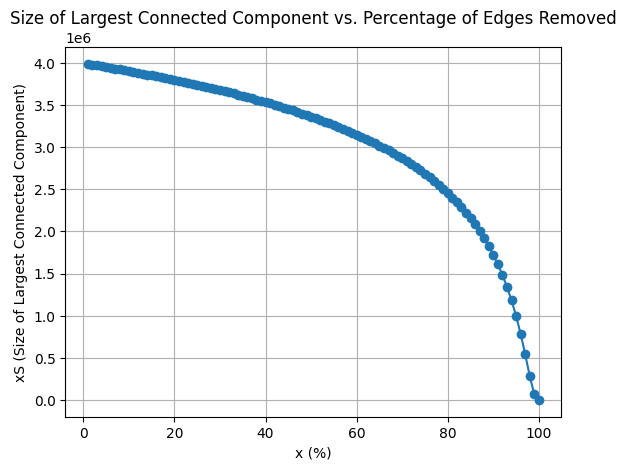

In [4]:
# Plotting
plt.plot(x_values, xS_values, marker='o')
plt.xlabel('x (%)')
plt.ylabel('xS (Size of Largest Connected Component)')
plt.title('Size of Largest Connected Component vs. Percentage of Edges Removed')
plt.grid(True)
plt.show()